<h2 style="color:blue" align="center"> Adult </h2> 

<h2 style="color:green" align="left"> Data Visualization : Matplotlib and Seaborn </h2>

### Objective :
- The goal of project is to predict whether a person makes over 50K a year or not.


- This is a classification problem.

### Importing Libraries

In [24]:
# Read Data
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,8)

# style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

### Read Data

In [25]:
# Import first 5 rows
df = pd.read_csv("adult_Dataset.txt", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
headers = ["Age", "Sector", "ID", "Qualification", "Group", "Marital Status", "Occupation", "Status", "Color",
            "Sex", "Column1", "Column2", "Column3", "Country", "Target"]
           
df = pd.read_csv("adult_Dataset.txt", header=None, names=headers, na_values="?")
df.head()

,Age,Sector,ID,Qualification,Group,Marital Status,Occupation,Status,Color,Sex,Column1,Column2,Column3,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
df['Target'].value_counts()

 <=50K    24720
 >50K      7841
Name: Target, dtype: int64

In [47]:
df['Target'] = [0 if x == '>50K' else 1 for x in df['Target'] ]

In [48]:
df['Target'].value_counts()

1    32561
Name: Target, dtype: int64

In [44]:
df.head()

,Age,Sector,ID,Qualification,Group,Marital Status,Occupation,Status,Color,Sex,Column1,Column2,Column3,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [6]:
df.shape

(32561, 15)

In [7]:
df.dtypes

Age                int64
Sector            object
ID                 int64
Qualification     object
Group              int64
Marital Status    object
Occupation        object
Status            object
Color             object
Sex               object
Column1            int64
Column2            int64
Column3            int64
Country           object
Target            object
dtype: object

### Missing Values

In [20]:
df.isnull().sum()

Age               0
Sector            0
ID                0
Qualification     0
Group             0
Marital Status    0
Occupation        0
Status            0
Color             0
Sex               0
Column1           0
Column2           0
Column3           0
Country           0
Target            0
dtype: int64

### EDA (Exploratory Data Analysis)

In [9]:
df.Sex.value_counts()

 Male      21790
 Female    10771
Name: Sex, dtype: int64

In [10]:
df.Color.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Color, dtype: int64

In [12]:
df.Qualification.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Qualification, dtype: int64

### Summary and count for categorical attribute

In [39]:
# Summary and count for Numerical attribute
df.describe()

,Age,ID,Group,Column1,Column2,Column3,Target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,0.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,NaN
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,NaN
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,NaN
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,NaN
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,NaN
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,NaN
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,NaN


In [40]:
# Summary and count for categorical attribute
df.describe(include=["O"])

,Sector,Qualification,Marital Status,Occupation,Status,Color,Sex,Country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


### Univariate Analysis

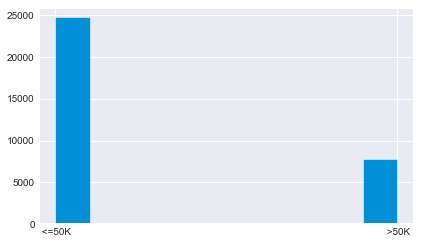

In [27]:
plt.hist(df.Target)
plt.show()

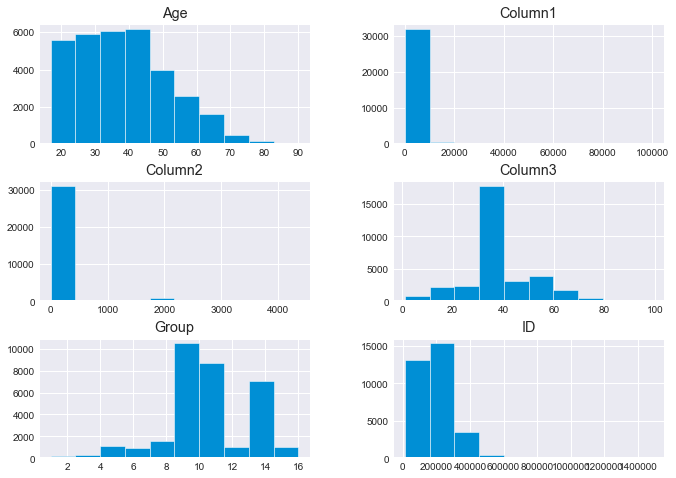

In [25]:
# Histrogram for Independant features
df.hist(figsize = (10,8))
plt.show()

Text(0.5, 1.0, 'age Vs count')

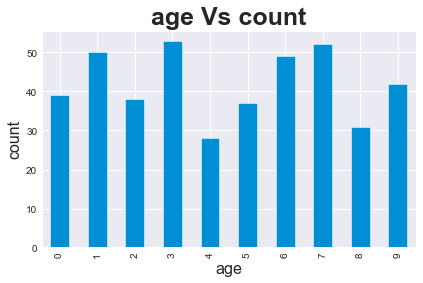

In [29]:
data = df['Age'].head(10)
data.plot.bar()

plt.xlabel('age', fontsize = 16)
plt.ylabel('count', fontsize = 16)

plt.title('age Vs count', fontsize = 25, fontweight = 'bold')

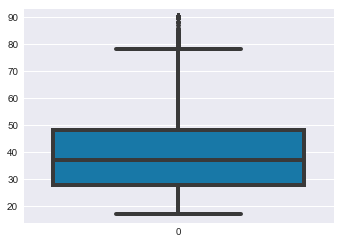

In [52]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df.Age, palette='winter')

### Bivariate Analysis

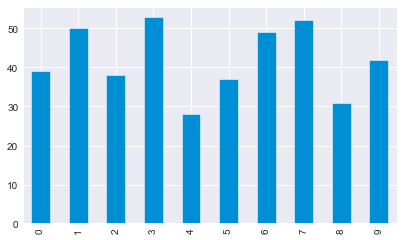

In [31]:
x = df['Sector']
y = df['Age']
data.plot.bar(x,y)

<BarContainer object of 32561 artists>

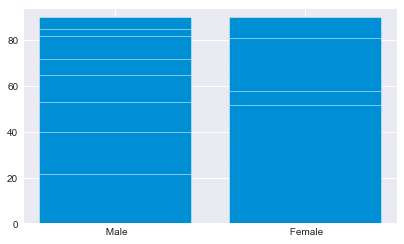

In [34]:
plt.bar('Sex', 'Age', data=df)

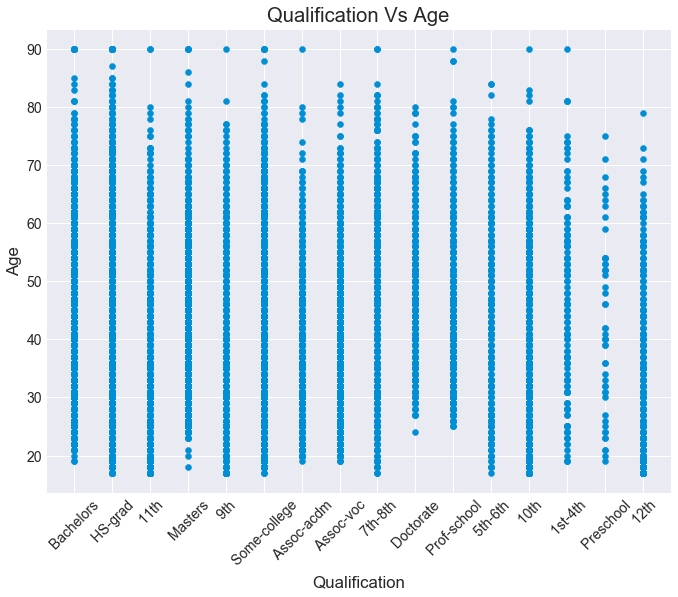

In [31]:
# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df['Qualification'], df['Age'])

plt.xlabel('Qualification')
plt.ylabel('Age')

plt.title('Qualification Vs Age')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

### Count Plot

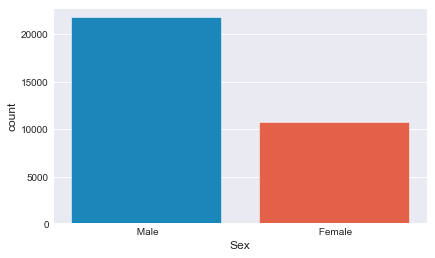

In [17]:
sns.countplot('Sex', data=df)

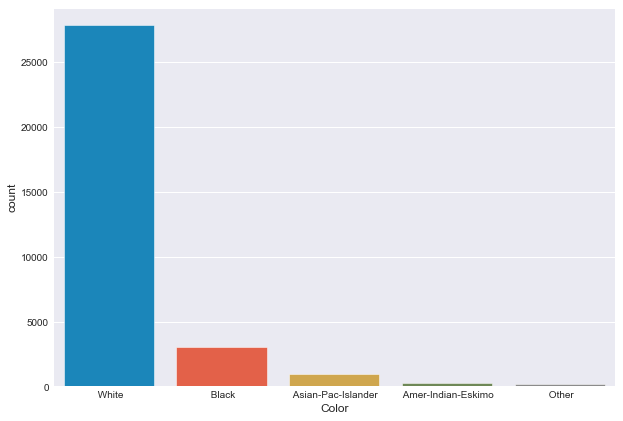

In [19]:
plt.figure(figsize=(9,7))
sns.countplot('Color', data=df)

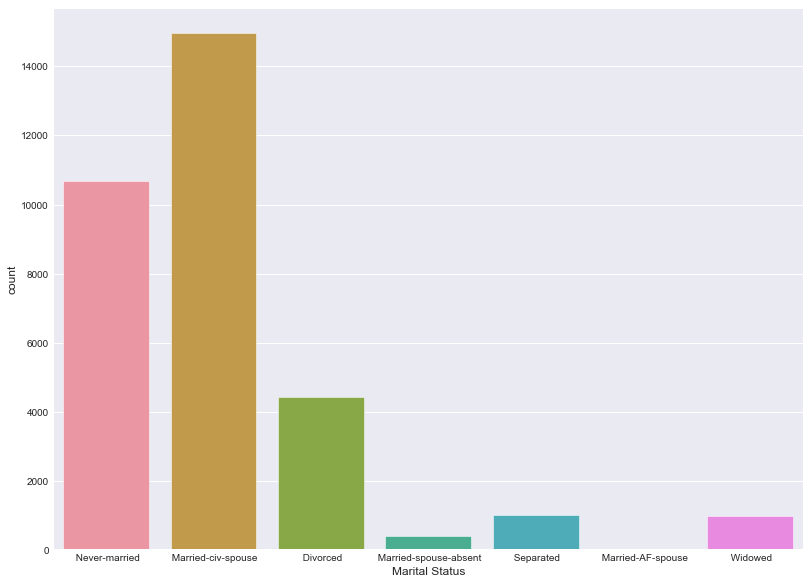

In [21]:
plt.figure(figsize=(12,10))
sns.countplot('Marital Status', data=df)

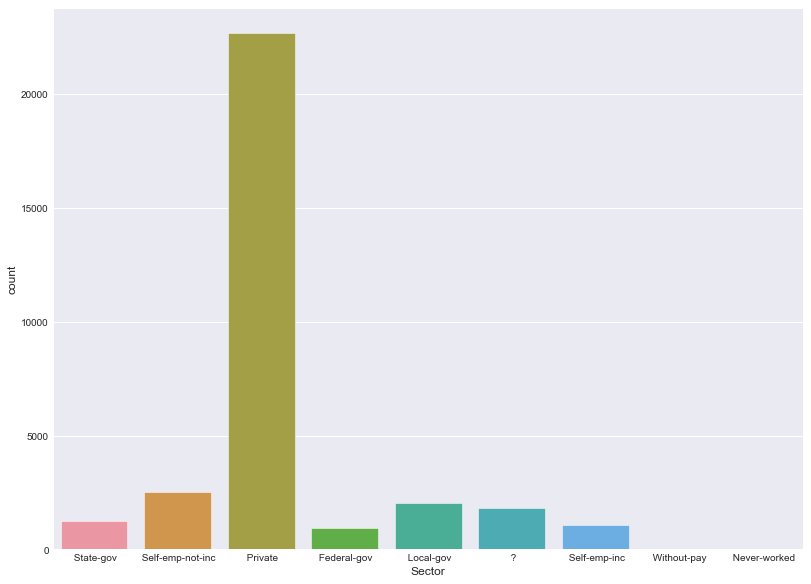

In [22]:
plt.figure(figsize=(12,10))
sns.countplot('Sector', data=df)

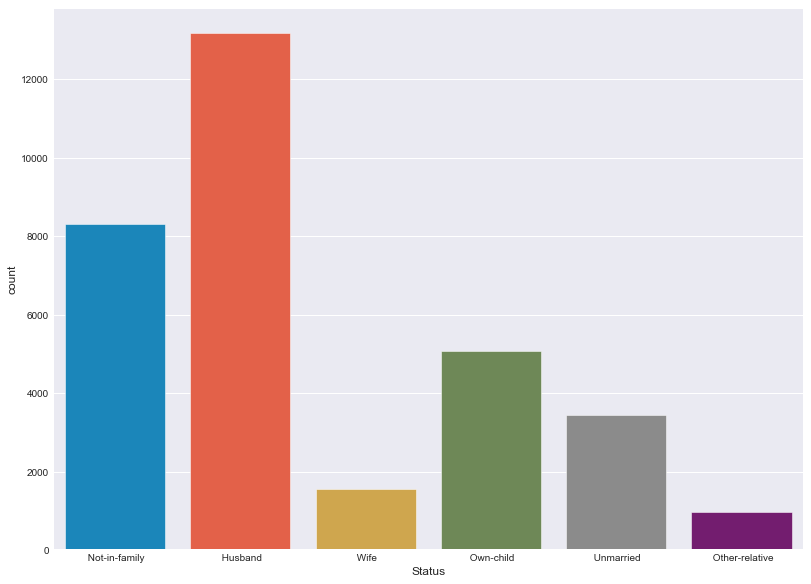

In [24]:
plt.figure(figsize=(12,10))
sns.countplot('Status', data=df)

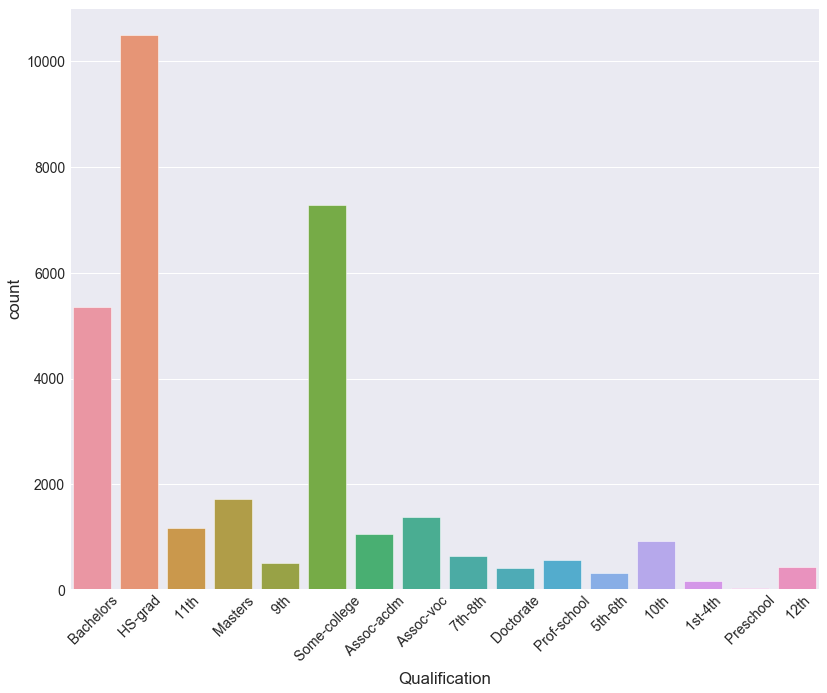

In [32]:
plt.figure(figsize=(12,10))
sns.countplot('Qualification', data=df)
plt.xticks(rotation = 45)
plt.show()

### Box Plot

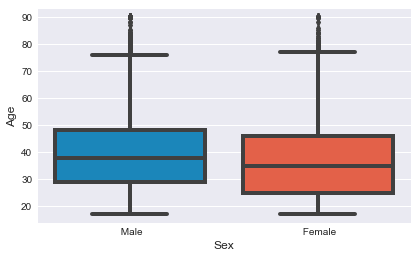

In [42]:
sns.boxplot(x='Sex', y='Age', data=df)

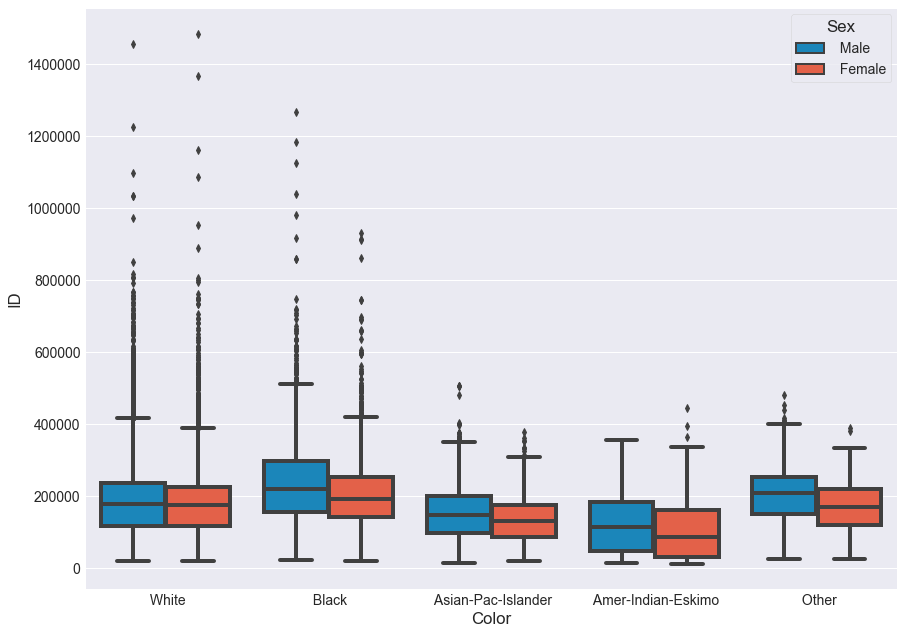

In [35]:
plt.figure(figsize=(13,10))
sns.boxplot(x='Color', y='ID', data=df, hue='Sex')

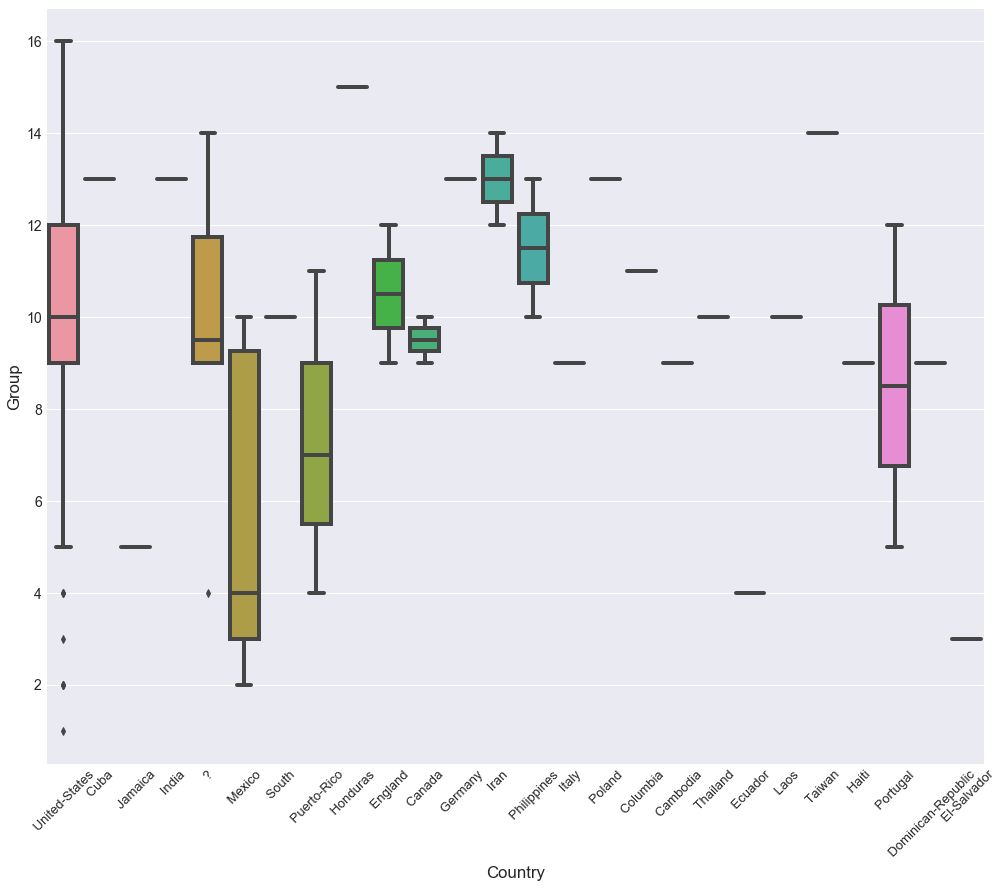

In [33]:
plt.figure(figsize=(15,13))
sns.boxplot(x=df['Country'].head(500), y=df['Group'].head(500), data=df)
plt.xticks(rotation = 45, fontsize=13)
plt.show()

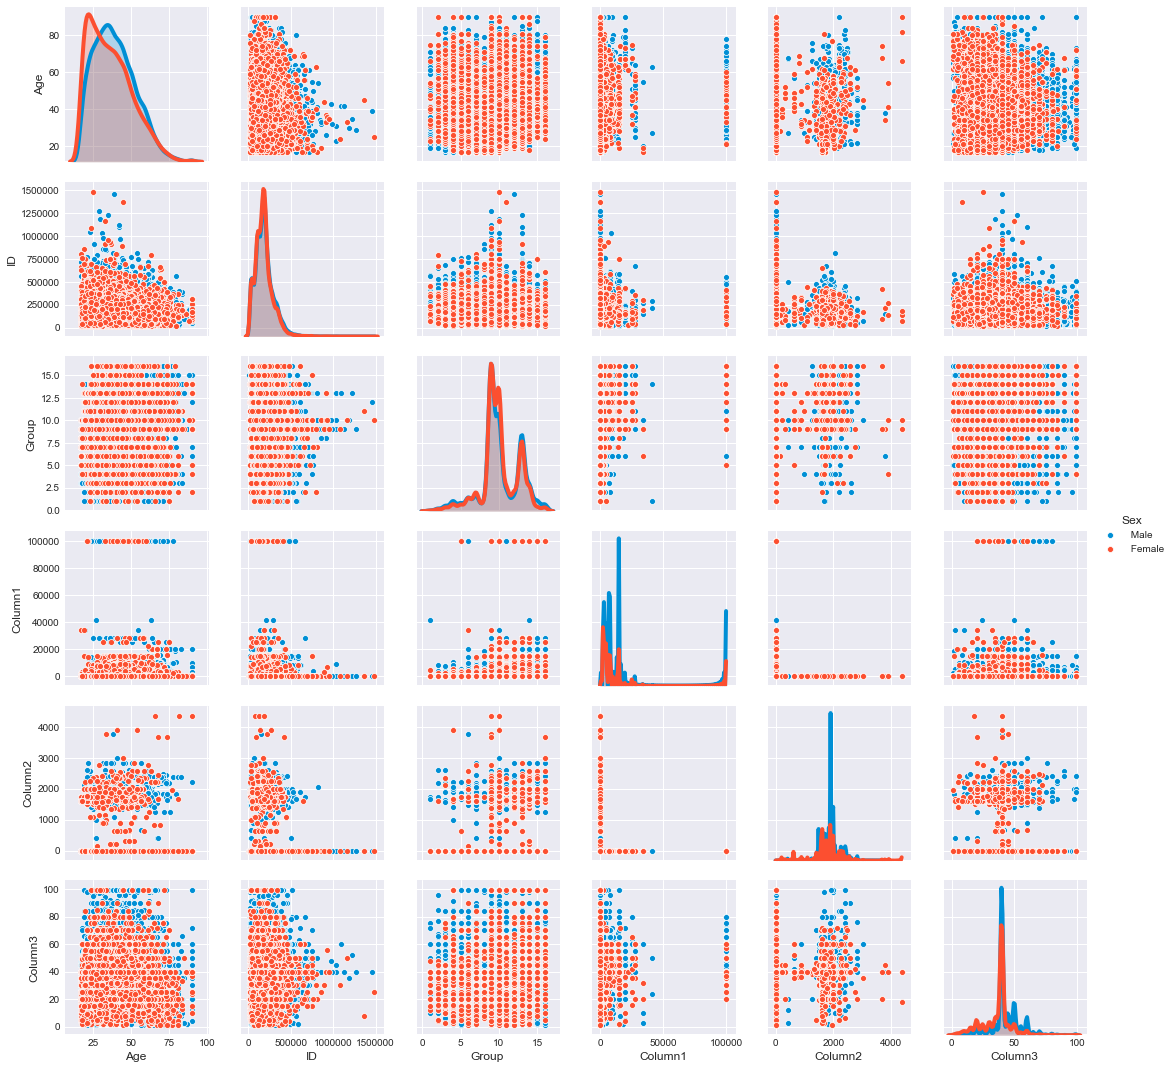

In [26]:
sns.pairplot(df, hue="Sex")

C:\Users\deepusuresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\deepusuresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


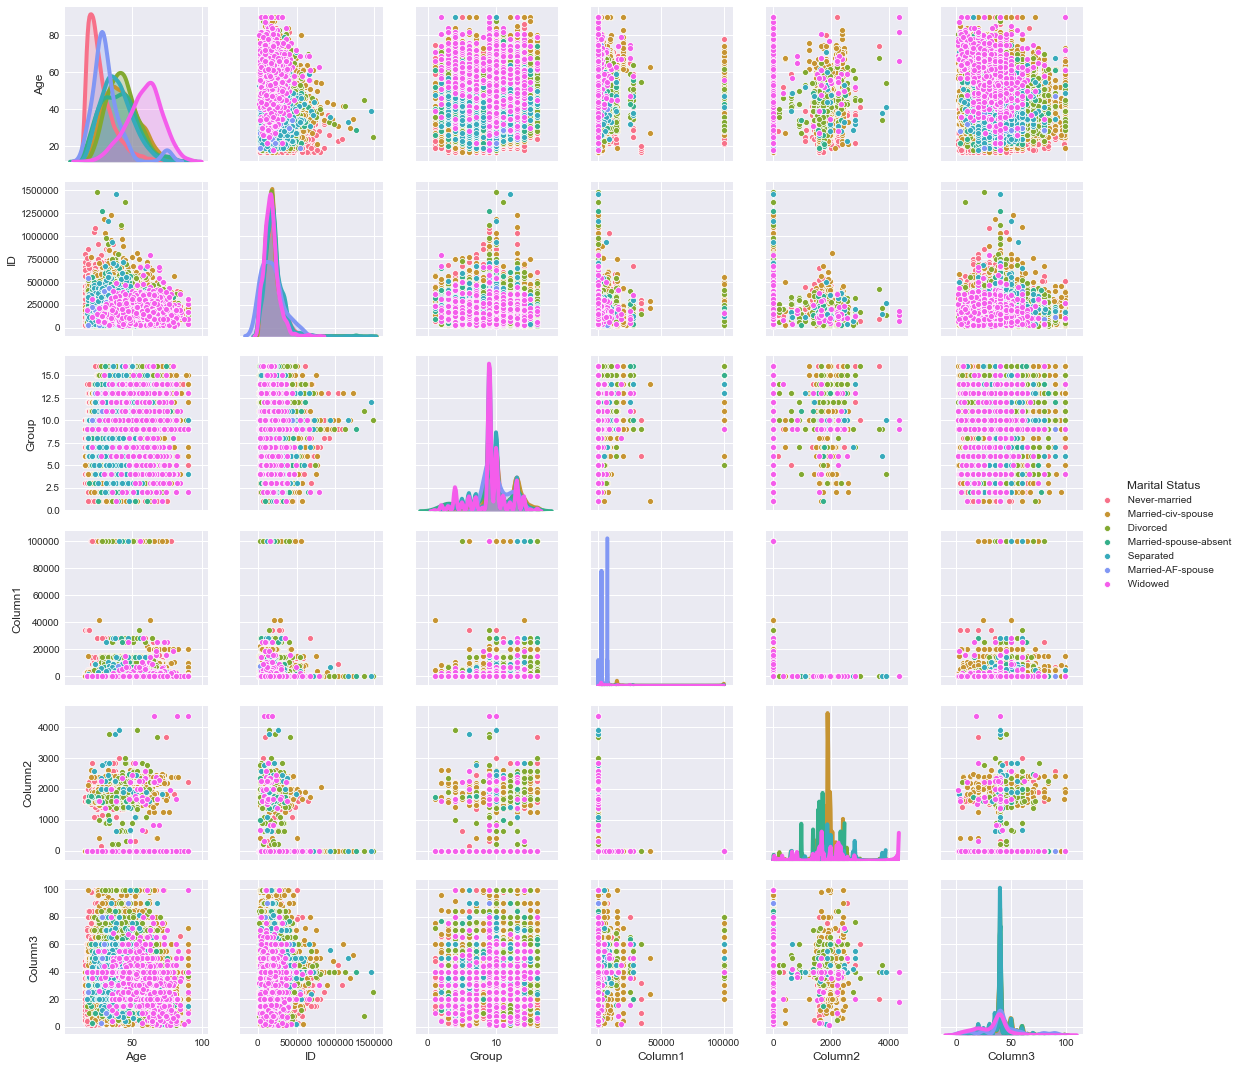

In [28]:
sns.pairplot(df, hue="Marital Status")

### Violin Plots
- Generates only for Numerical data

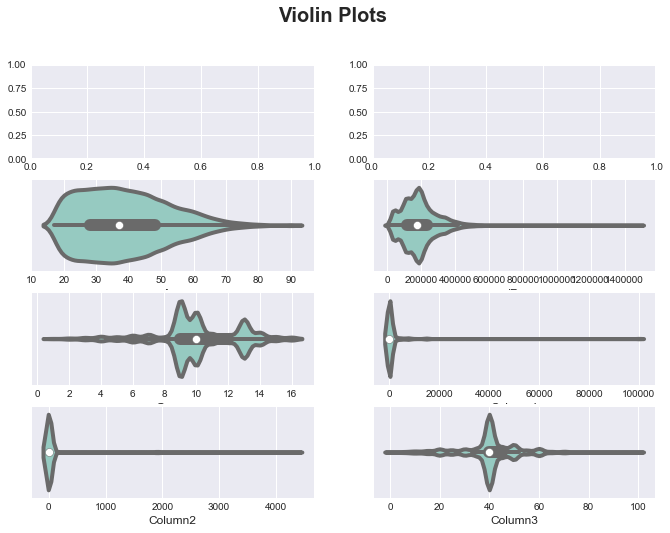

In [54]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(10,8))
plt.suptitle('Violin Plots', fontsize=20, fontweight = 'bold')
sns.violinplot (x='Age', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='ID', data=df, ax=ax[1,1], palette='Set3')
sns.violinplot(x="Group", data=df, ax=ax[2,0], palette='Set3')
sns.violinplot(x="Column1", data=df, ax=ax[2,1], palette='Set3')
sns.violinplot (x ='Column2', data=df, ax=ax[3,0], palette='Set3')
sns.violinplot(x='Column3', data=df, ax=ax[3,1], palette='Set3')
plt.show()

### Dist Plot
- Generates only for Numerical data

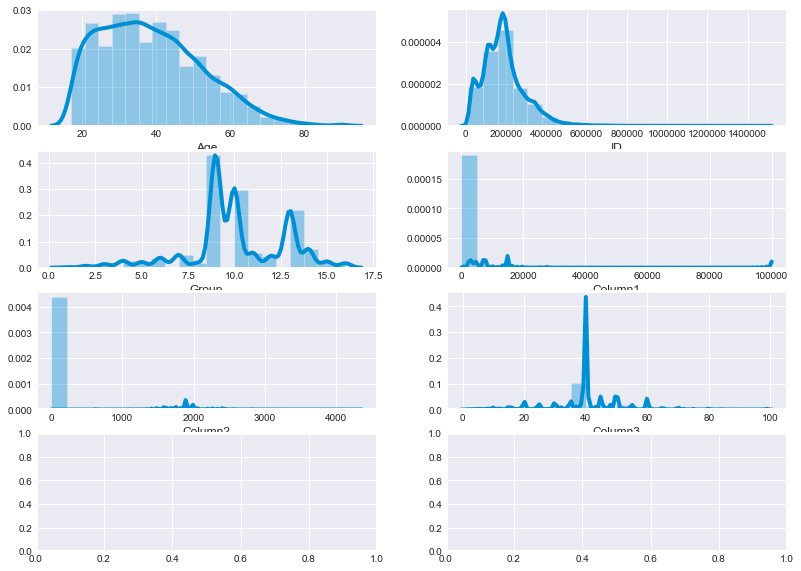

In [57]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.ID, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Group, bins = 20, ax=ax[1,0]) 
sns.distplot(df.Column1, bins = 20, ax=ax[1,1])
sns.distplot(df.Column2, bins = 20, ax=ax[2,0]) 
sns.distplot(df.Column3, bins = 20, ax=ax[2,1])
plt.show()

### Regrssion Plot

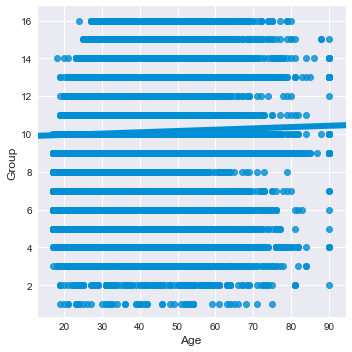

In [64]:
sns.lmplot(x='Age', y='Group', data=df)

### Cat Plot

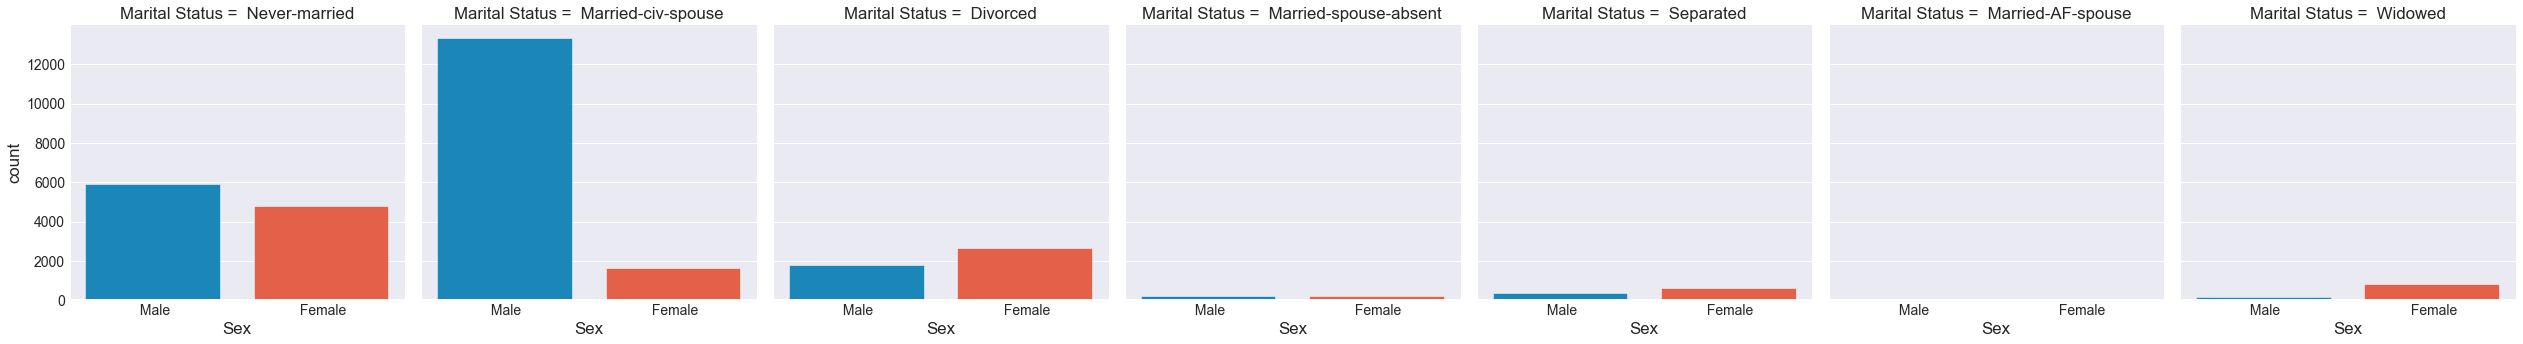

In [36]:
sns.catplot(x='Sex', col='Marital Status', kind='count', data=df)

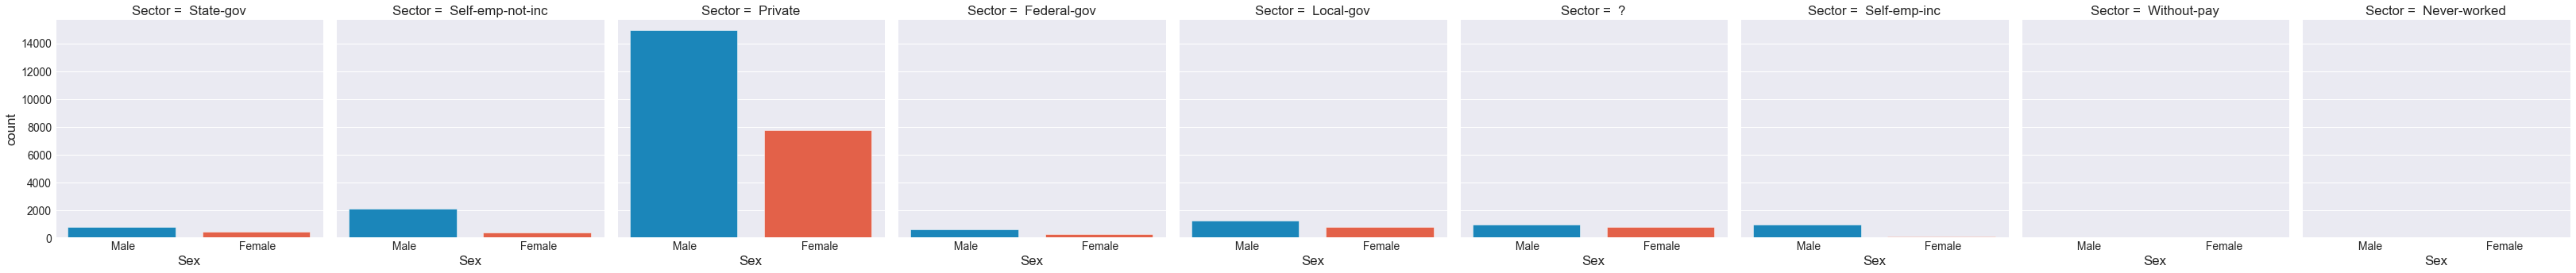

In [38]:
sns.catplot(x='Sex', col='Sector', kind='count', data=df)